In [3]:
import urllib.request
import urllib.parse
import json
import matplotlib.pyplot as plt
import numpy as np
import random
import pylab
from scipy.ndimage.filters import gaussian_filter
import seaborn as sns
from numpy import random

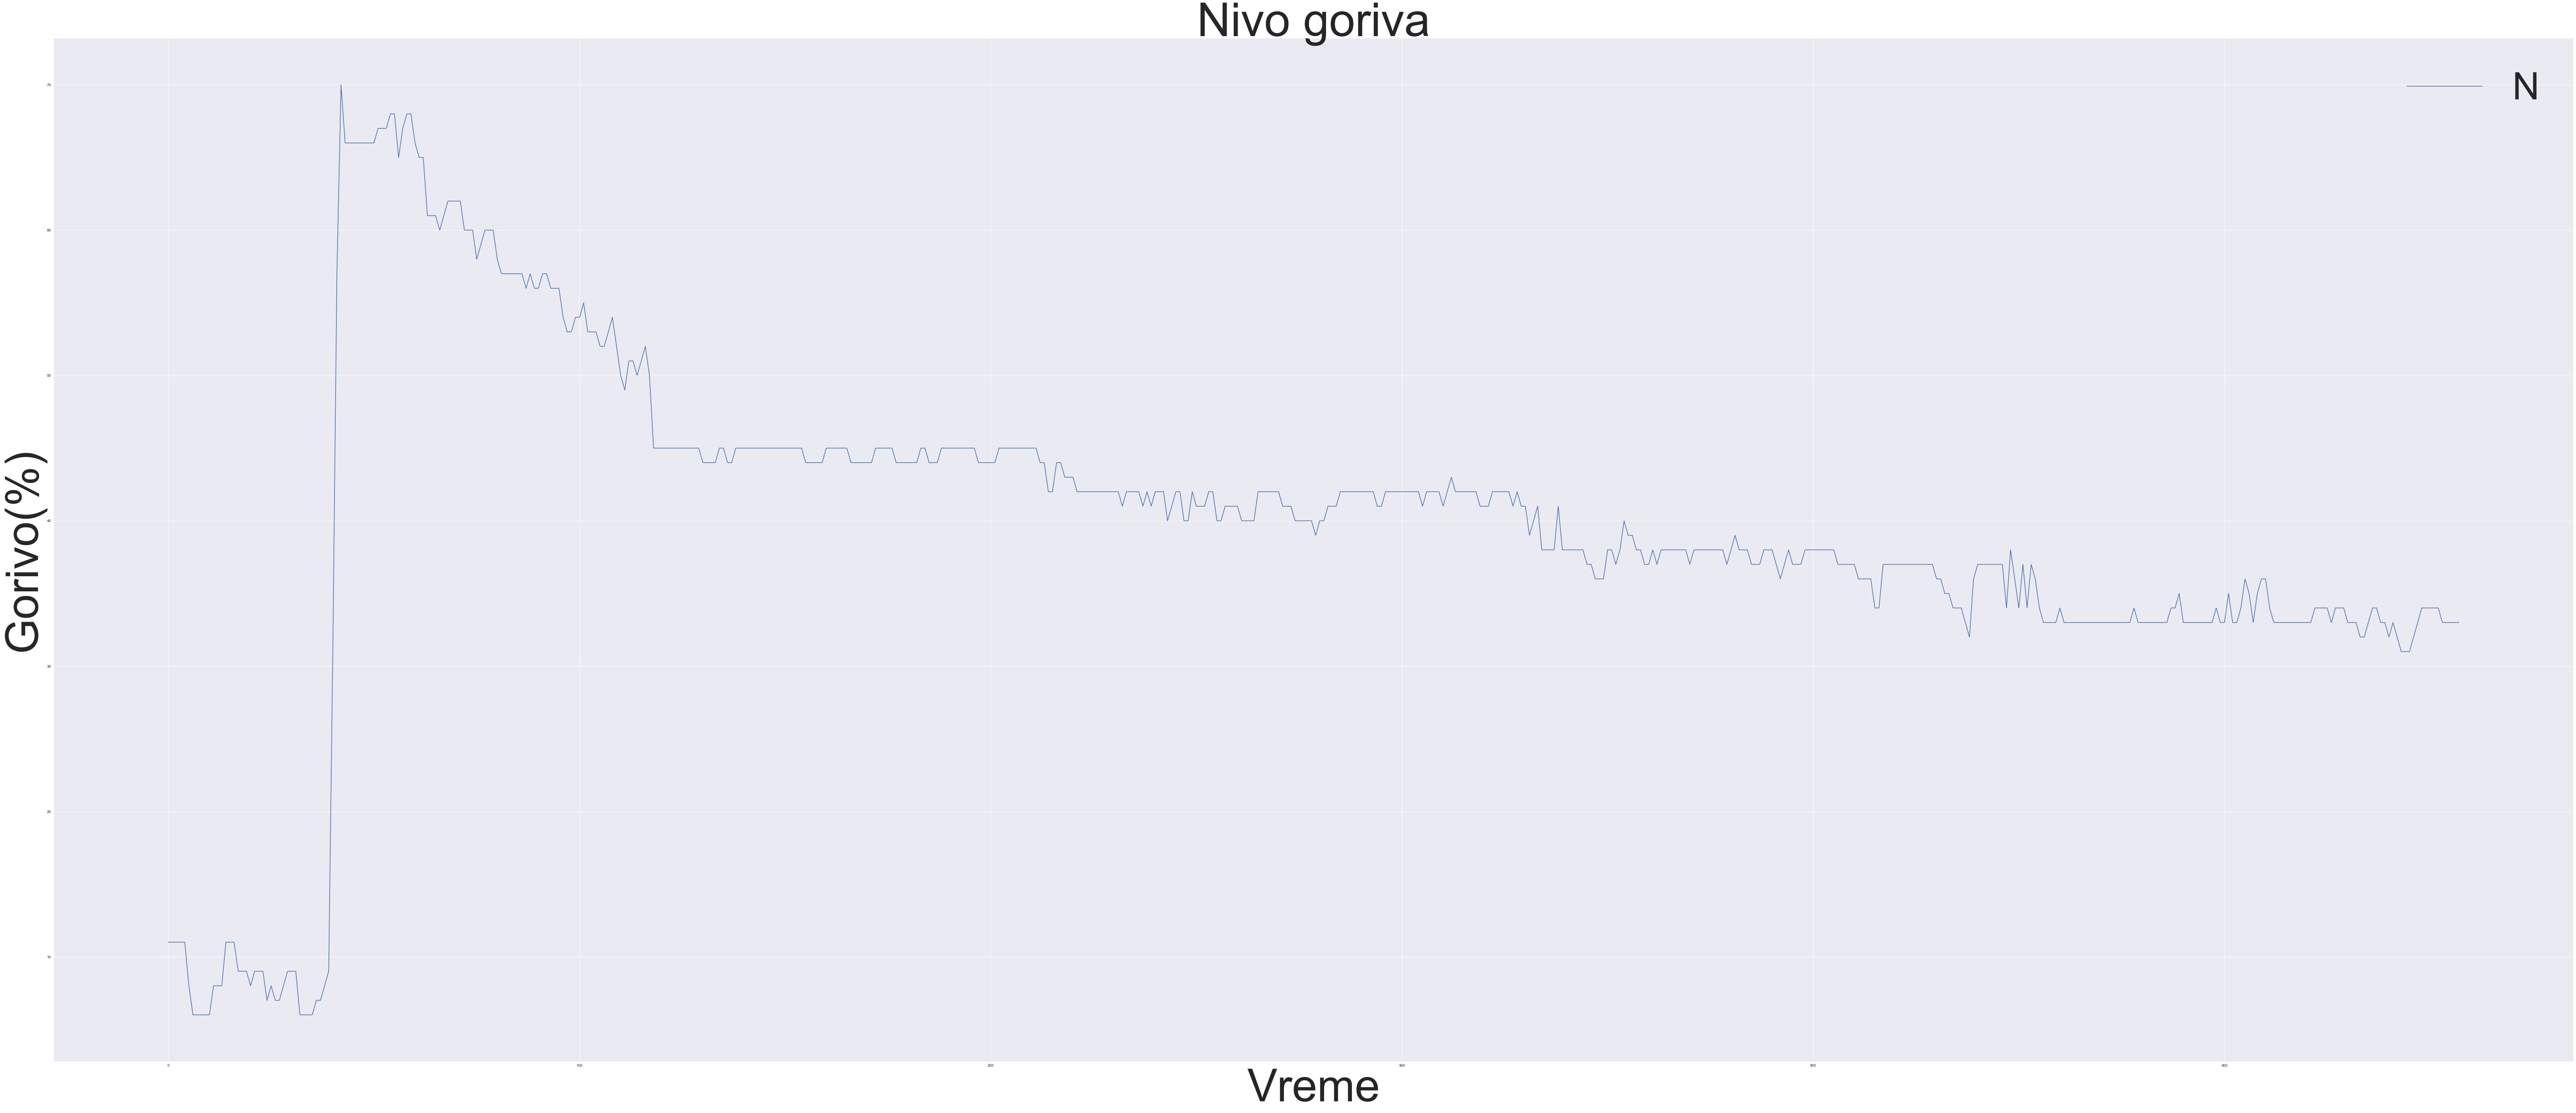

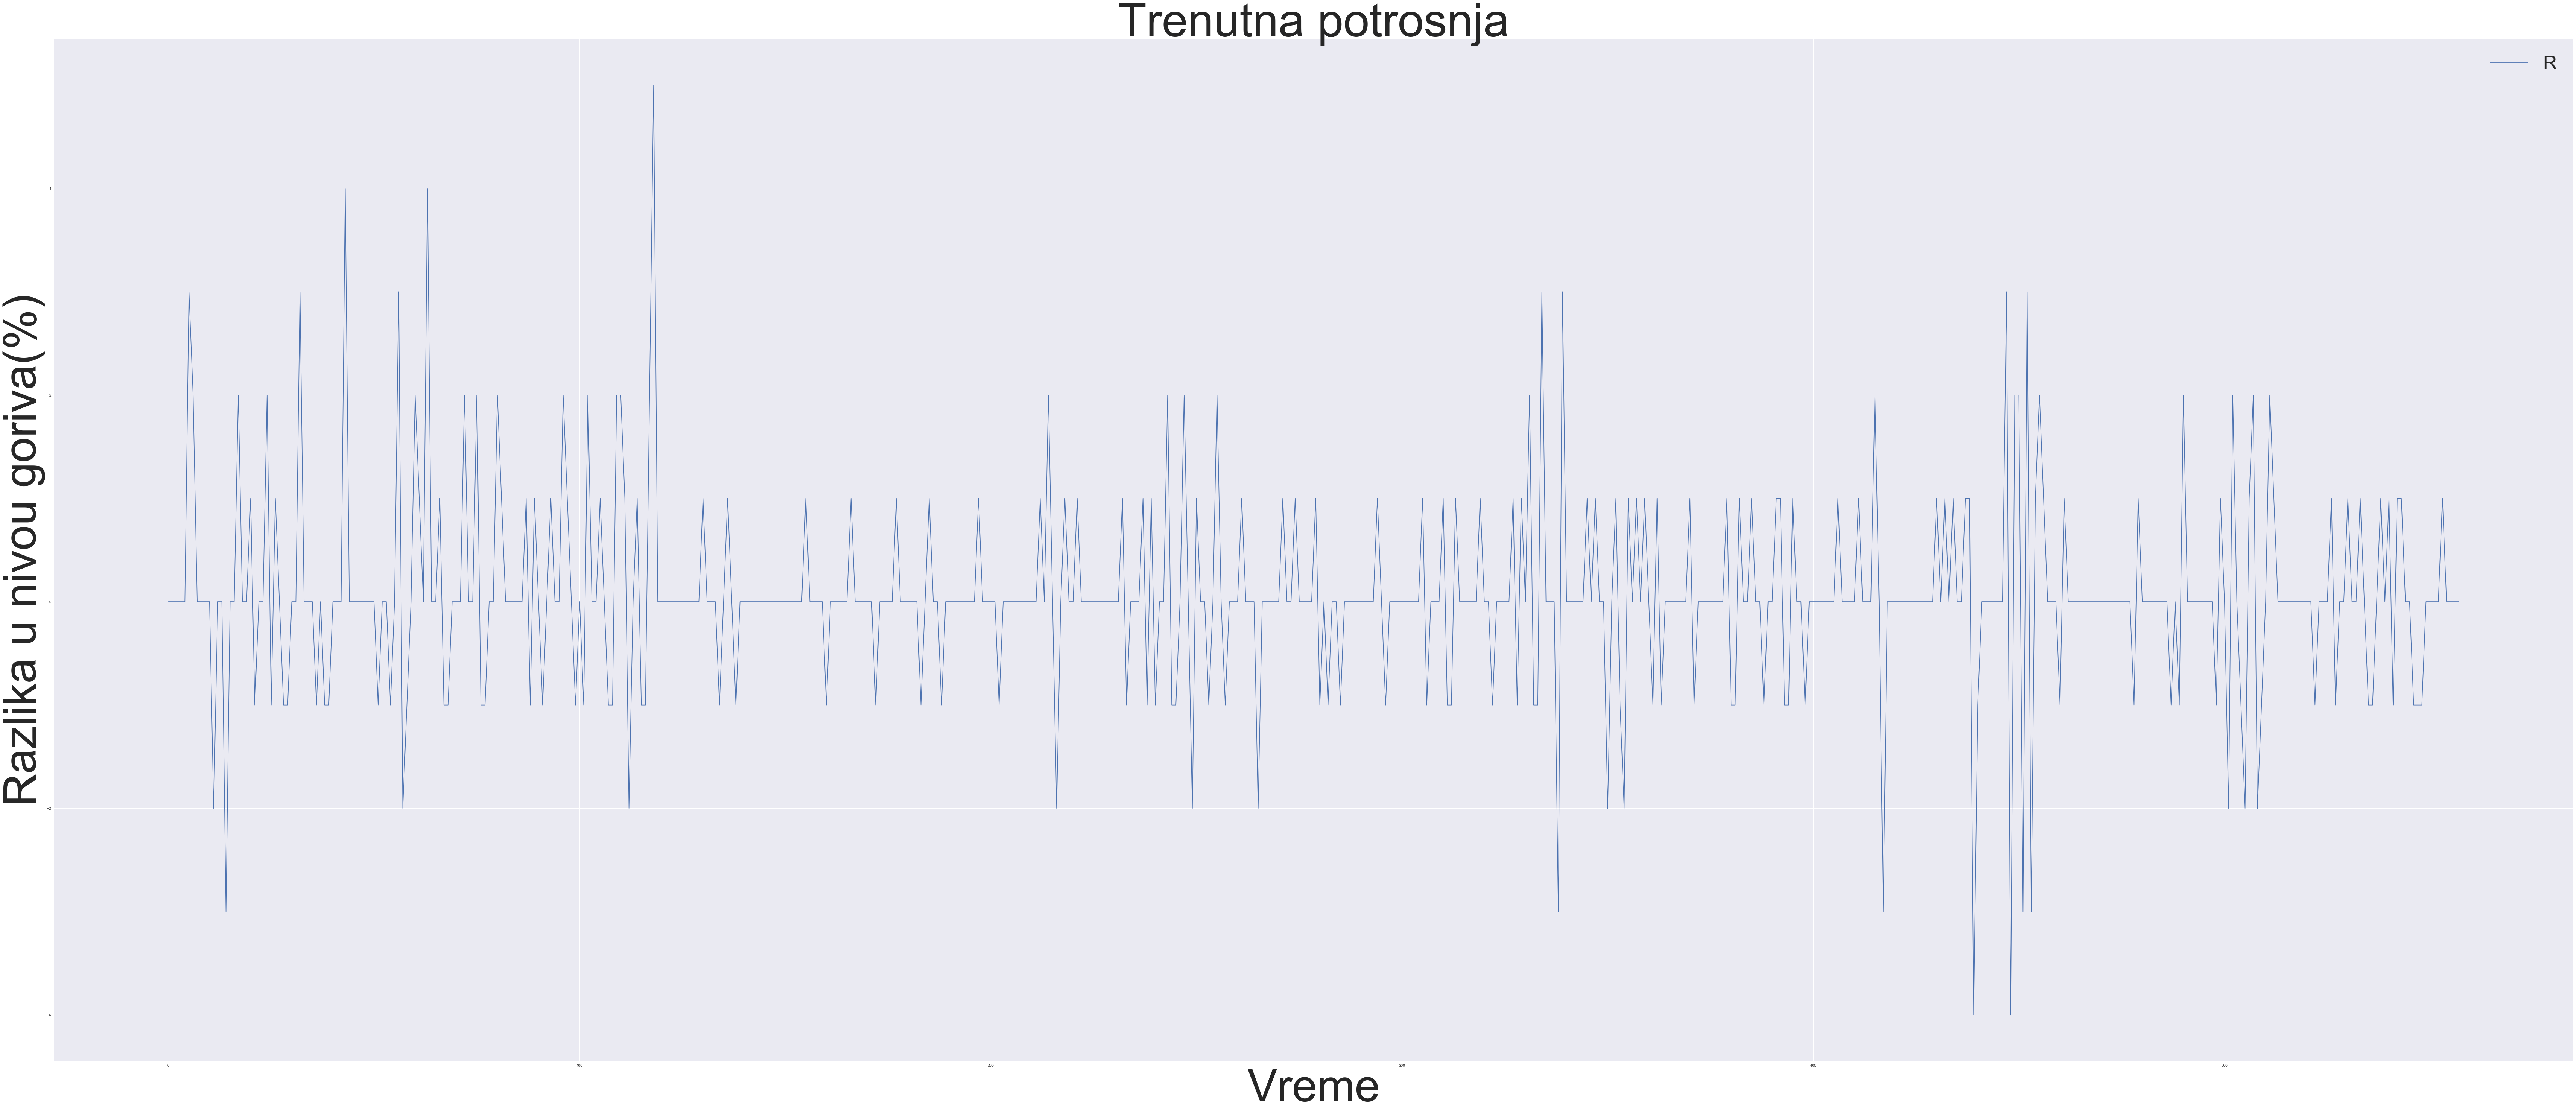

In [73]:
log = open('nivoGoriva.txt', 'r')
clean = open('nivoGoriva2.txt', 'w')
fuel_level_str = log.read().split('\n')
log.close()

fuel_level = []
fuel_level_diff = []
i = 0
temp = 11
temp1 = float(fuel_level_str[0])
for i in range(0, len(fuel_level_str)):
    #print(fuel_level[i])
    
    if fuel_level_str[i] == 'NULL' or fuel_level_str[i] == '0':
        #fuel_level_str[i] = temp
        continue
    else:
        fuel_level_diff_curr = float(temp) - float(fuel_level_str[i])
        if abs(fuel_level_diff_curr) > 5:
            fuel_level_diff_curr = 0
            #print("usao")
            #print(i)
    
        fuel_level_diff.append(fuel_level_diff_curr)
        temp = fuel_level_str[i]
        #print(fuel_level_str[i])
        fuel_level.append(float(fuel_level_str[i]))
        clean.write(fuel_level_str[i] + '\n')
    
clean.close()
pylab.figure(figsize=(120,50))
pylab.plot(range(len(fuel_level)),fuel_level)
pylab.xlabel('Vreme', fontsize=120)
pylab.ylabel('Gorivo(%)', fontsize=120)
pylab.title('Nivo goriva', fontsize=124)
pylab.legend(('Nivo goriva u procentima'), fontsize=100)
pylab.show()

pylab.figure(figsize=(120,50))
pylab.plot(range(len(fuel_level_diff)),fuel_level_diff)
pylab.xlabel('Vreme', fontsize=120)
pylab.ylabel('Razlika u nivou goriva u svakom merenju', fontsize=120)
pylab.title('Trenutna potrosnja', fontsize=124)
pylab.legend(('Razlika u nivou goriva u svakom merenju'), fontsize=100)
pylab.show()

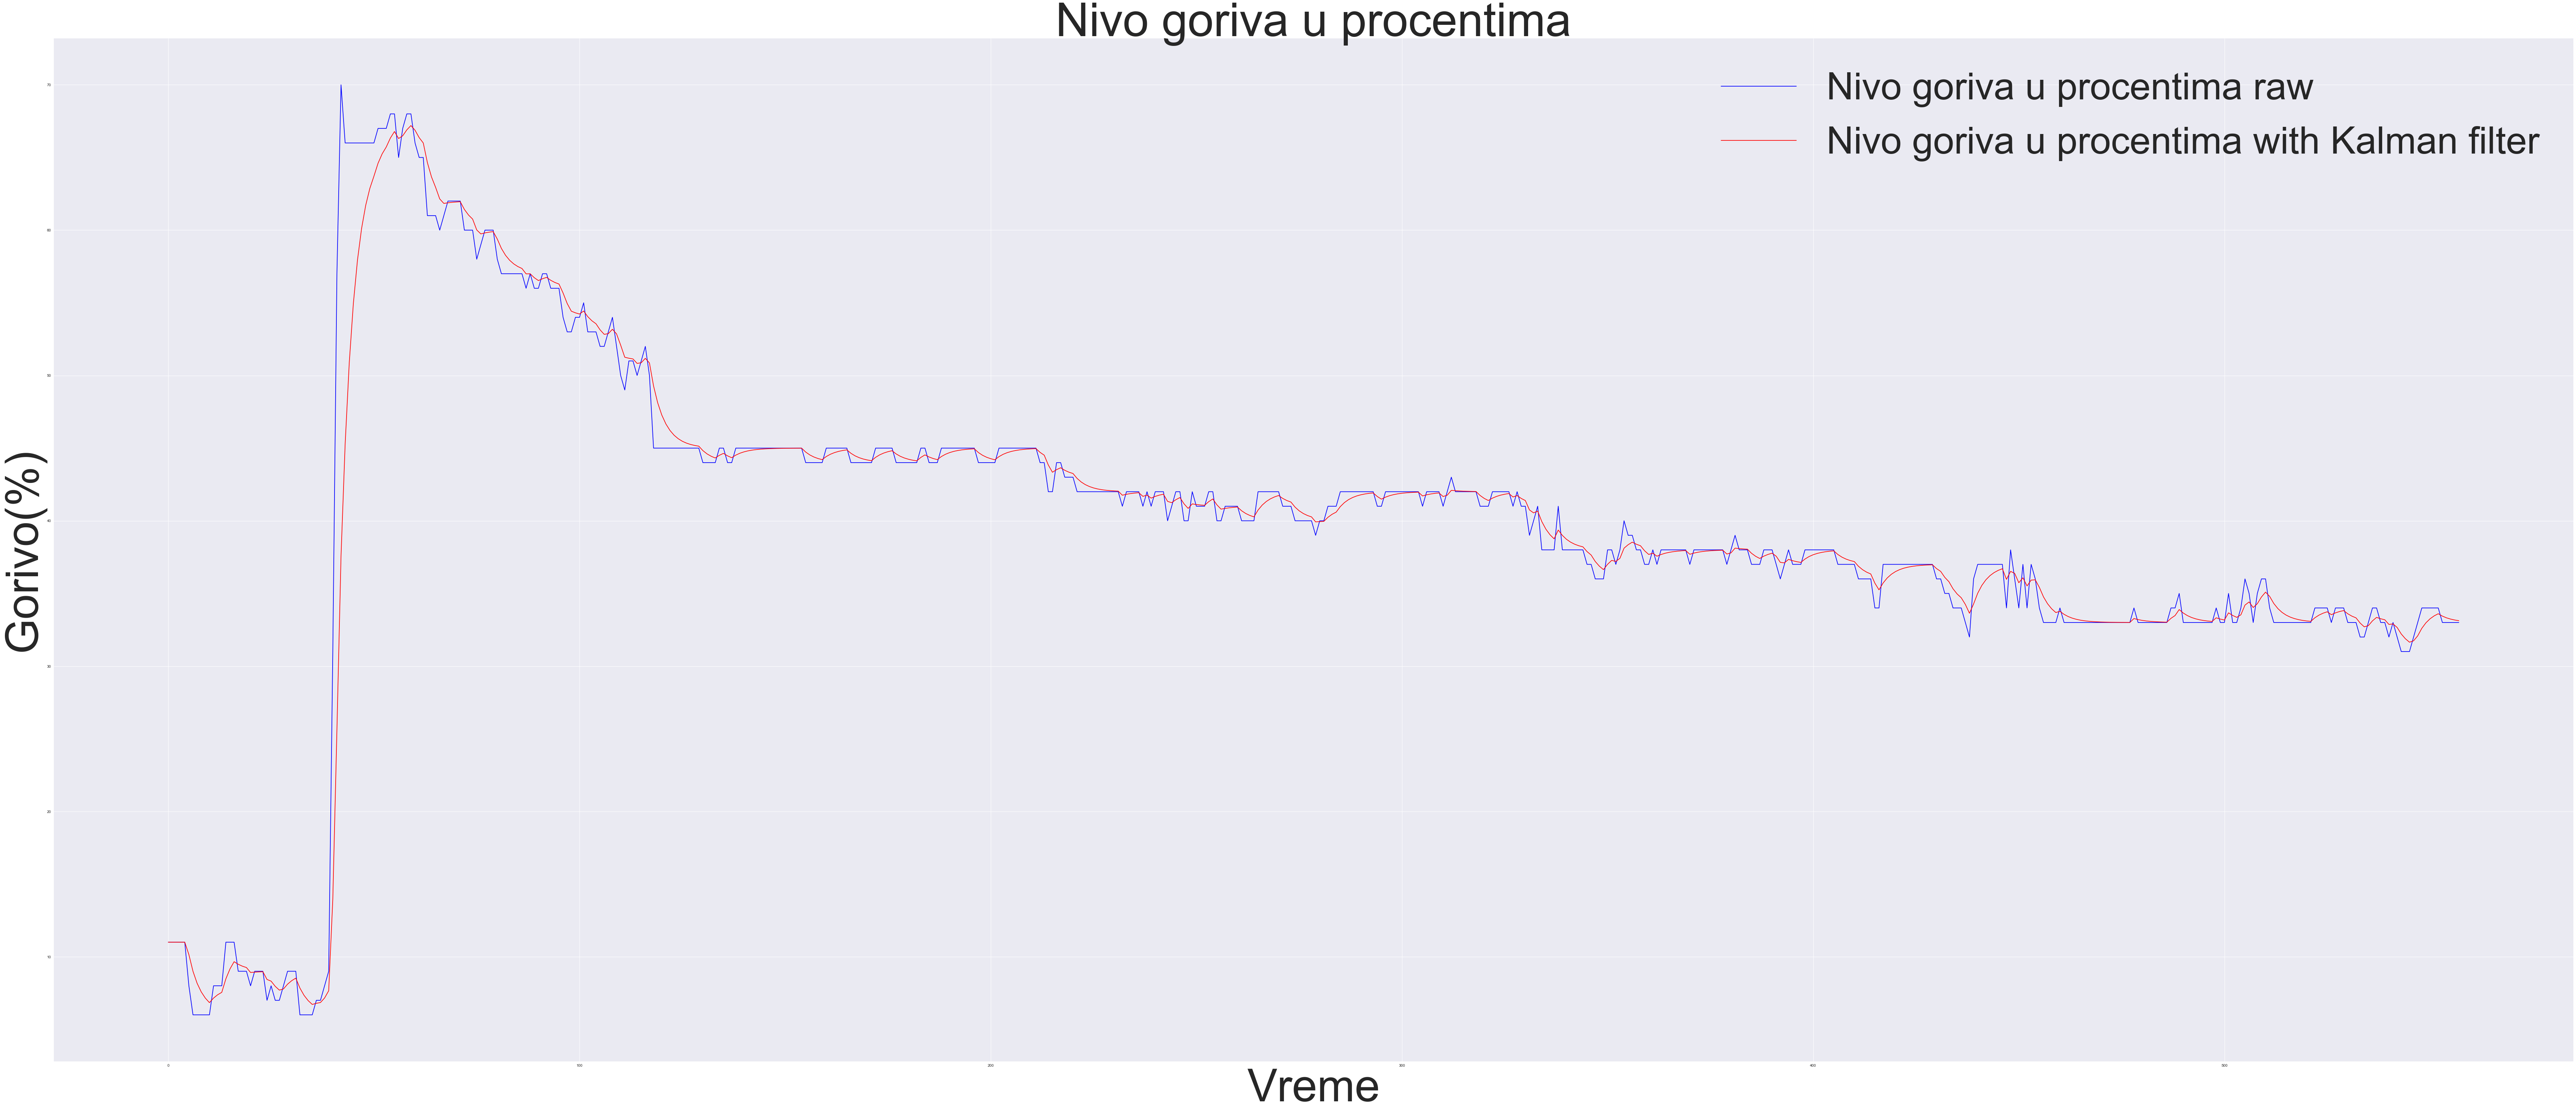

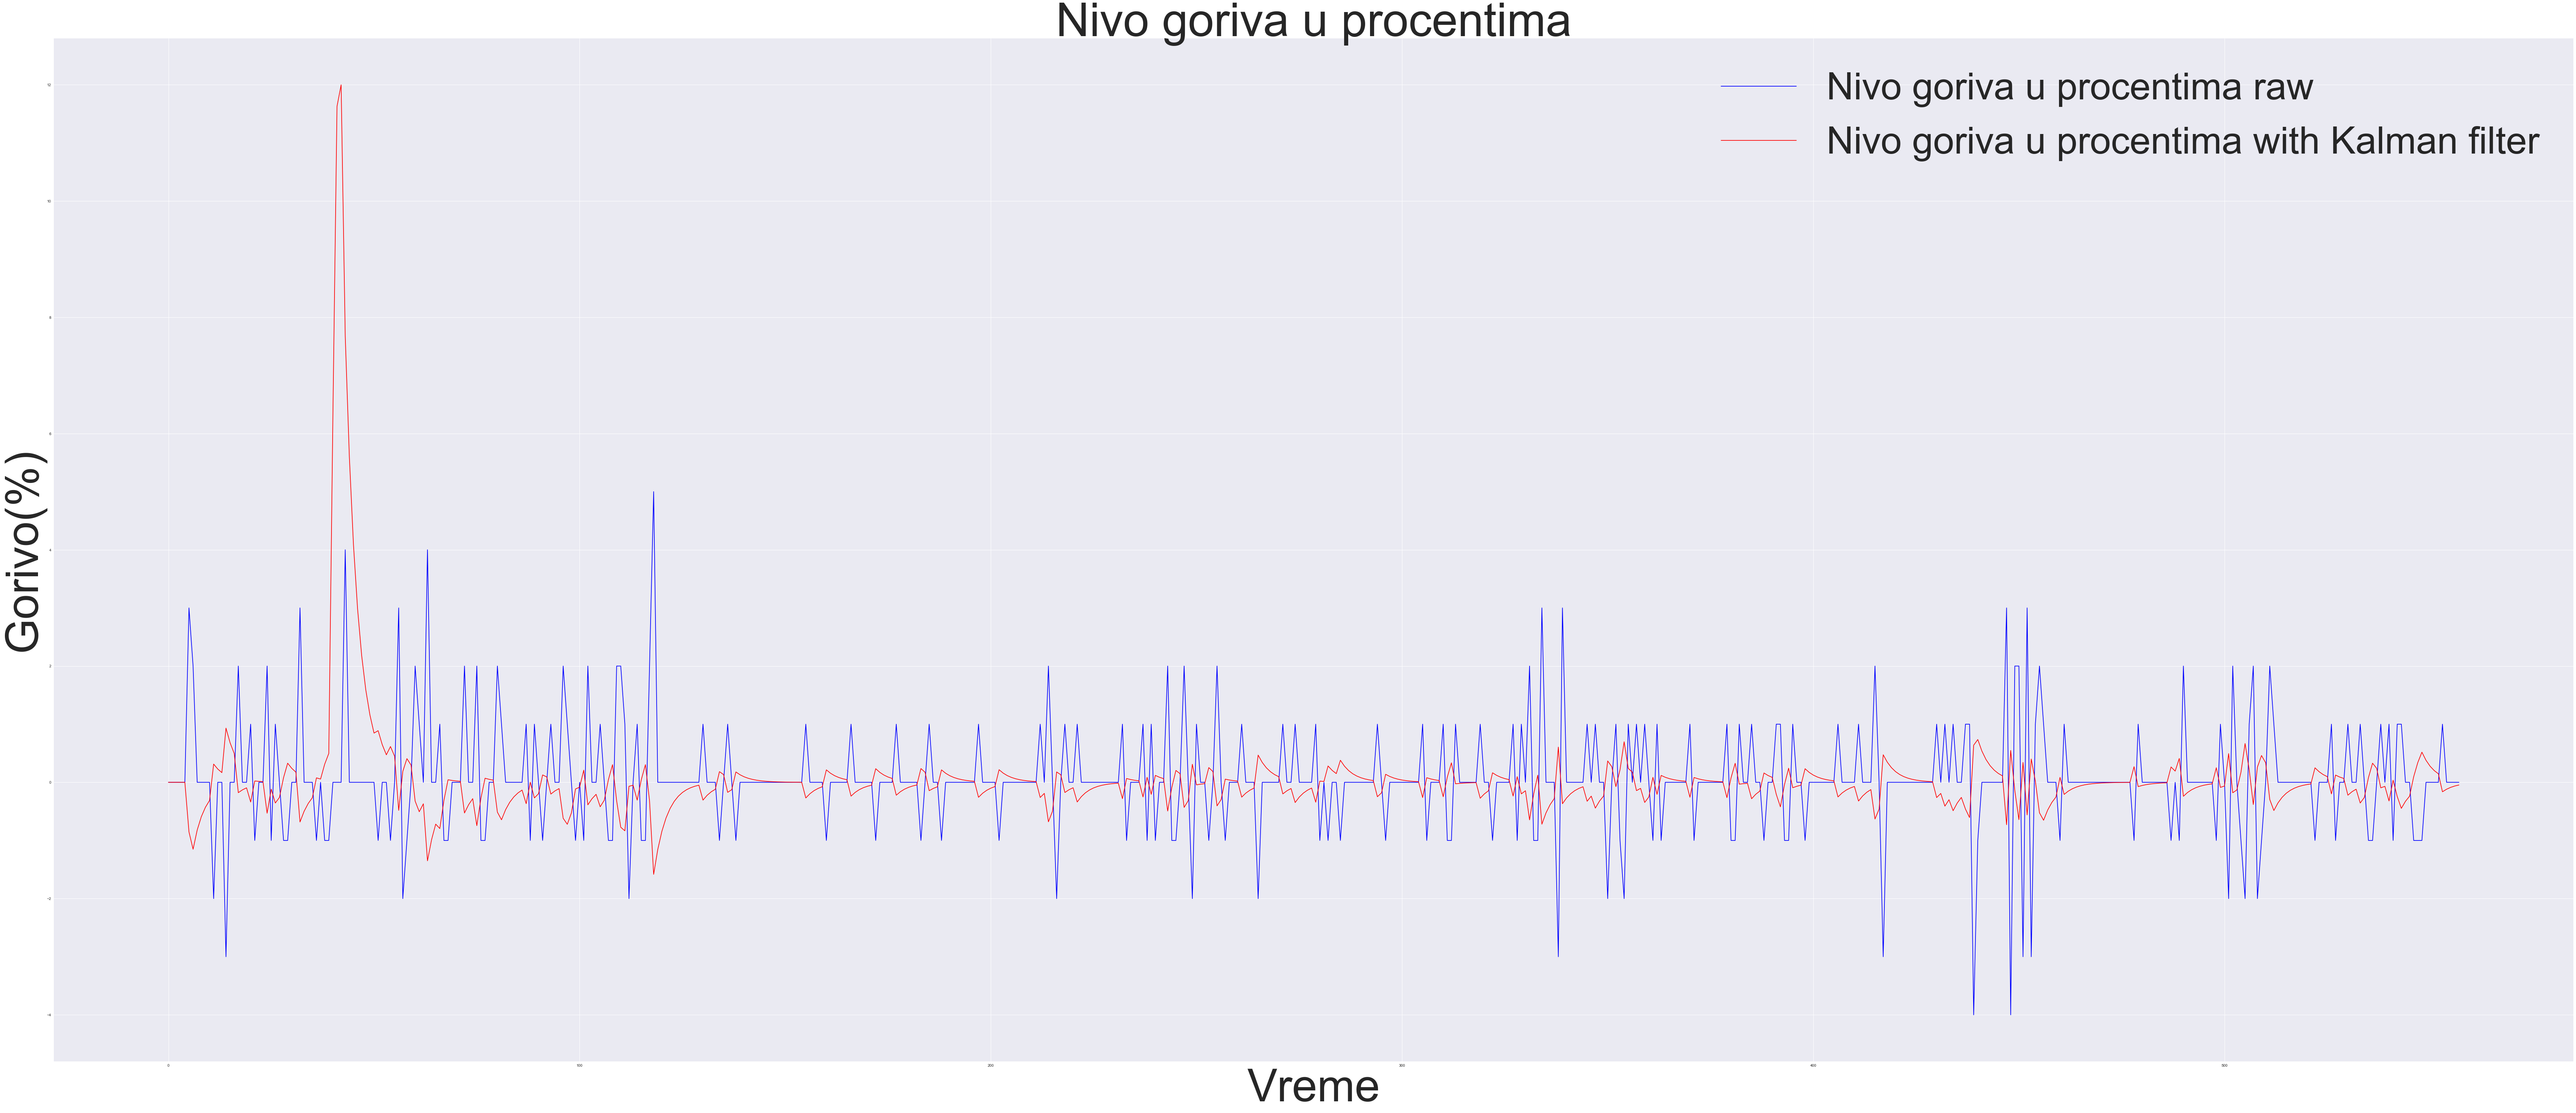

In [70]:
#pocetna stanja
fuel_level_prev = float(fuel_level[0])
#fuel_level_prev = fuel_level_diff[0]
Pkprev = 1.0
Hprev = 1
q = 0.01

log = open('nivoGorivaKalman.txt', 'w')
#log = open('nivoGoriva3.txt', 'w')

fuel_level_kalman = []
fuel_level_diff_kalman = []

for z in range (0, len(fuel_level)):

    #prediction
    a = 1

    #ukoliko je a=1
    fuel_level_predicted = float(a*fuel_level_prev)               #x[k] = a*x[k-1] + Buk
    
    #ukoliko je a=mean21List[z]
    #LCpredicted = float(a*btldiffs[z])           #x[k] = a*x[k-1] + Buk
    Pk = a*Pkprev*a + q                          #p[k] = a * p[k - 1] * a + q

    #update 
    y = float(fuel_level[z]) - Hprev*fuel_level_predicted   #y = z - h * x[k]
    kg = Pk*Hprev/(Hprev*Pk*Hprev + 0.1)        #kg = p * h / (h * p * h + r)
    fuel_level_k = fuel_level_predicted + kg*y                    #x[k] = x[k] + kg * y
    Pk = (1 - Hprev*kg)*Pk                      #p[k] = (1 - kg * h) * p[k]

    fuel_level_diff_curr = float(fuel_level_k) - float(fuel_level_prev)
    if abs(fuel_level_diff_curr) > 15:
        fuel_level_diff_curr = 0
        fuel_level_k = 0
        print(z)
    
    fuel_level_prev = fuel_level_k
    Pkprev = Pk
        
    fuel_level_kalman.append(fuel_level_k)
    log.write(str(fuel_level_k) + '\n')
    
    
    fuel_level_diff_kalman.append(fuel_level_diff_curr)
    
log.close()
pylab.figure(figsize=(120,50))
pylab.plot(range(len(fuel_level)),fuel_level,'b',range(len(fuel_level_kalman)),fuel_level_kalman,'r')
pylab.xlabel('Vreme', fontsize=120)
pylab.ylabel('Gorivo(%)', fontsize=120)
pylab.title('Nivo goriva u procentima', fontsize=124)
pylab.legend(('Nivo goriva u procentima raw','Nivo goriva u procentima with Kalman filter'), fontsize=100)
#naredna linija koda je zakomentarisana ali ako se otkomentariše, može se kontrolisati prikaz na x i y osi
#pylab.axis([0,1000,-60,90])              #pylab.axis([x,x1,-y,y1])
pylab.show()

log.close()
pylab.figure(figsize=(120,50))
pylab.plot(range(len(fuel_level_diff)),fuel_level_diff,'b',range(len(fuel_level_diff_kalman)),fuel_level_diff_kalman,'r')
pylab.xlabel('Vreme', fontsize=120)
pylab.ylabel('Gorivo(%)', fontsize=120)
pylab.title('Nivo goriva u procentima', fontsize=124)
pylab.legend(('Nivo goriva u procentima raw','Nivo goriva u procentima with Kalman filter'), fontsize=100)
#naredna linija koda je zakomentarisana ali ako se otkomentariše, može se kontrolisati prikaz na x i y osi
#pylab.axis([0,1000,-60,90])            
pylab.show()